In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import welch, stft, butter, lfilter, sosfilt

In [2]:
def get_filtered_signal(data, f_hp=10000, f_lp=100000):
    fs = int(np.ceil(1 / (data[0, 1] - data[0, 0]))) # Sampling rate in Hz
    sos_hp = butter(8, f_hp, 'hp', fs=fs, output='sos')
    sos_lp = butter(8, f_lp, 'lp', fs=fs, output='sos')
    filtered = sosfilt(sos_hp, data[1])
    filtered_filtered = sosfilt(sos_lp, filtered)
    
    return filtered_filtered

In [37]:
def plot_tod(data, title='', mv=False):
    fig, ax = plt.subplots(figsize = (20, 6))

    ax.plot(data[0], data[1], 'b', label="Z detection")
    if mv:
        ax.plot(data[0], data[2]/1000, 'r', label="Applied impulse signal")
    else:
        ax.plot(data[0], data[2], 'r', label="Applied impulse signal")
    try:
        ax.plot(data[0], data[4], label="Feedback signal")
    except:
        pass

    ax.legend(frameon=False, fontsize=18)
    ax.set_xlabel('Time (s)', fontsize=18)
    ax.set_ylabel('Signal (V)', fontsize=18)
    ax.set_title(title, fontsize=18)
    
    return fig, ax

In [4]:
def lowpass_filtered(tod, fs, f_lp=50000):
    sos_lp = butter(8, f_lp, 'lp', fs=fs, output='sos')
    filtered = sosfilt(sos_lp, tod)
    
    return filtered

In [5]:
params = {'axes.labelsize': 18,
          'axes.titlesize': 18,
         'xtick.labelsize': 18,
         'ytick.labelsize': 18}
plt.rcParams.update(params)

In [6]:
# Calibration factor right before applying impulses
c_cal_square = 873281920520807.6

## 20 V, 6 us pulses

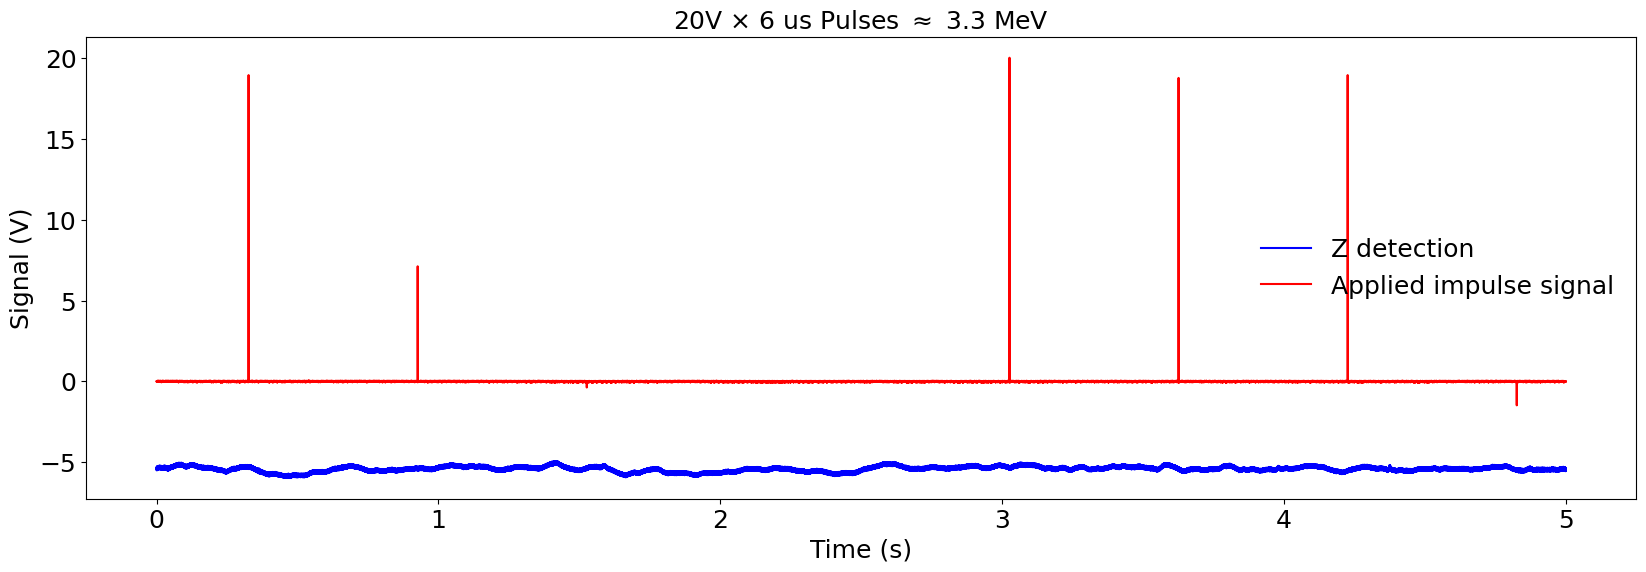

In [7]:
data_file = r"D:\Experiment\Pulse\20231118\pulse_20v_6us\pulse_20v_2us_10.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

plot_tod(data, r'20V $\times$ 6 us Pulses $\approx$ 3.3 MeV')
plt.show()

filtered = get_filtered_signal(data, 40000, 44000)

Text(0.5, 1.0, '20V $\\times$ 6 us Pulses $\\approx$ 3.3 MeV')

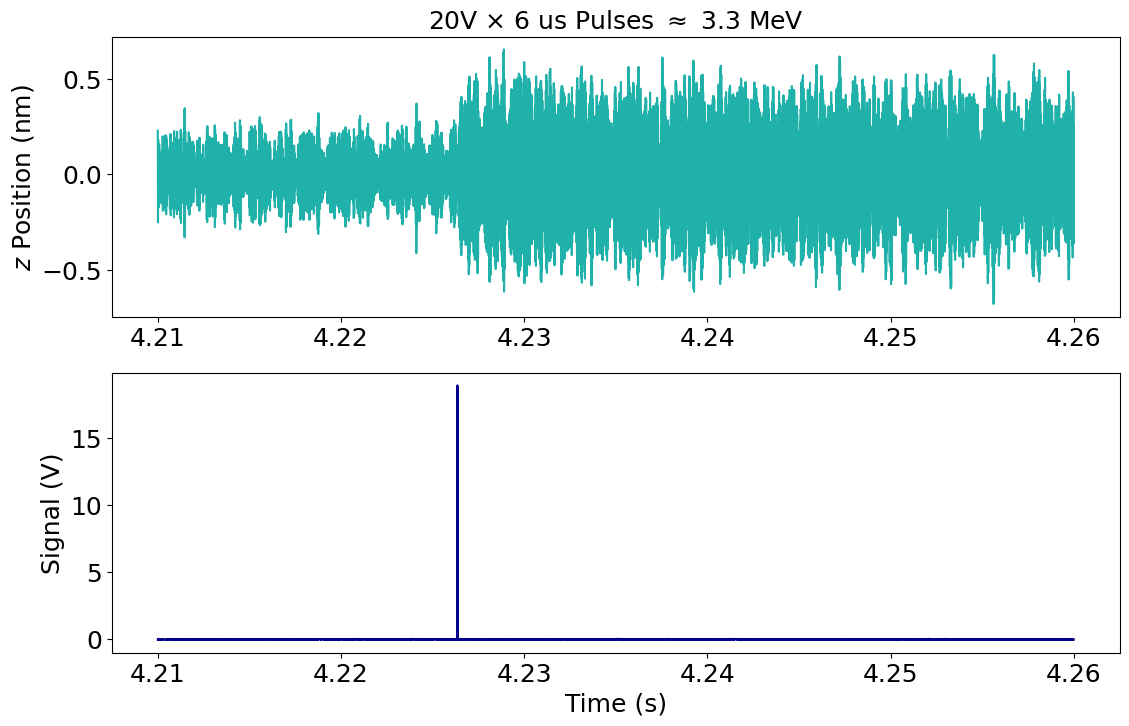

In [8]:
lb, ub = 842000, 852000
# lb, ub = 842000, 982000

fig, ax = plt.subplots(2, 1, figsize = (13, 8))
ax[0].plot(data[0, lb:ub], filtered[lb:ub]/np.sqrt(c_cal_square)/1e-9, label="Z detection (filtered)", color='lightseagreen')
ax[1].plot(data[0, lb:ub], data[2, lb:ub], label="Applied impulse signal", color='darkblue')

ax[1].set_xlabel('Time (s)', fontsize=18)
ax[0].set_ylabel('$z$ Position (nm)', fontsize=18)
ax[1].set_ylabel('Signal (V)', fontsize=18)
ax[0].set_title(r'20V $\times$ 6 us Pulses $\approx$ 3.3 MeV', fontsize=18)

In [200]:
c = 299792458    # m / s
SI2ev = (1 / 1.6e-19) * c

# Electric force on the particle
charge = 1 * 1.6e-19
efield = 120          # V/m when 1 V is applied
f0 = charge * efield

The pulses are 3239.393677595474 kev


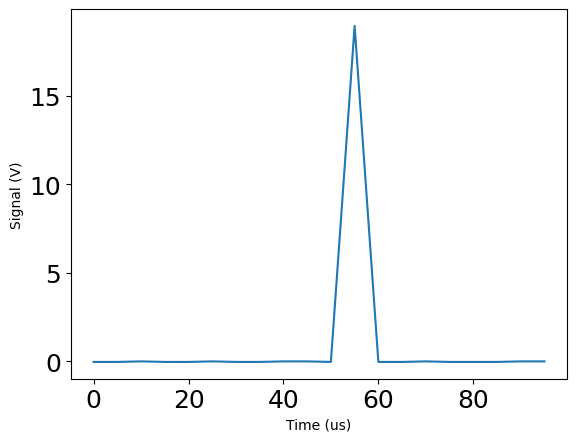

In [201]:
lb, ub = 845260, 845280

plt.plot((data[0, lb:ub] - data[0, lb])*1e6, data[2, lb:ub])
plt.xlabel('Time (us)')
plt.ylabel('Signal (V)')

print(f'The pulses are {f0 * np.trapz(data[2, lb:ub]+data[2, lb], data[0, lb:ub]) * SI2ev / 1000} kev')

Square the timestream and low pass filter to better see the impulses. It turns out there are a lot of peaks not aligned with the pulses so need more investigation.

In [33]:
z_nm = data[1]/np.sqrt(c_cal_square)/1e-9
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
lp_filtered = lowpass_filtered(z_filtered_nm**2, fs, 10)

Text(0.5, 1.0, '20V $\\times$ 6 us Pulses $\\approx$ 3.3 MeV')

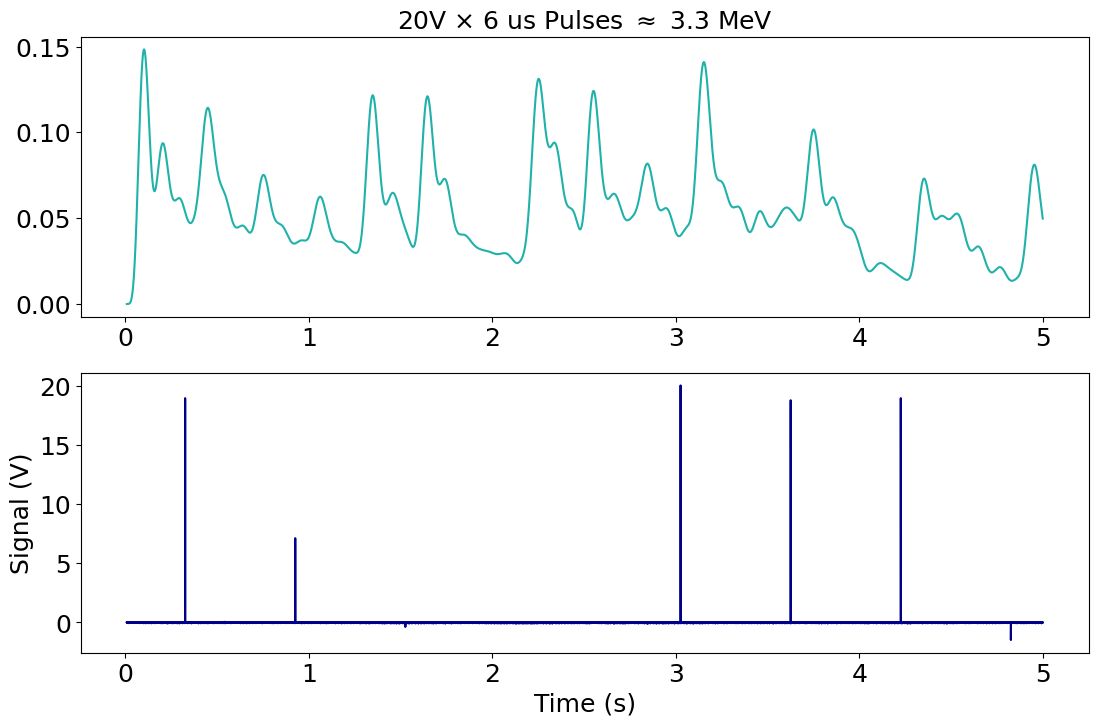

In [34]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))
ax[0].plot(data[0, 1700:], lp_filtered[1700:], label="Z detection (filtered)", color='lightseagreen')
ax[1].plot(data[0, 1700:], data[2, 1700:], label="Applied impulse signal", color='darkblue')

ax[1].set_xlabel('Time (s)', fontsize=18)
# ax[0].set_ylabel('$z$ Position (nm)', fontsize=18)
ax[1].set_ylabel('Signal (V)', fontsize=18)
ax[0].set_title(r'20V $\times$ 6 us Pulses $\approx$ 3.3 MeV', fontsize=18)

## 10 V, 6 us pulses

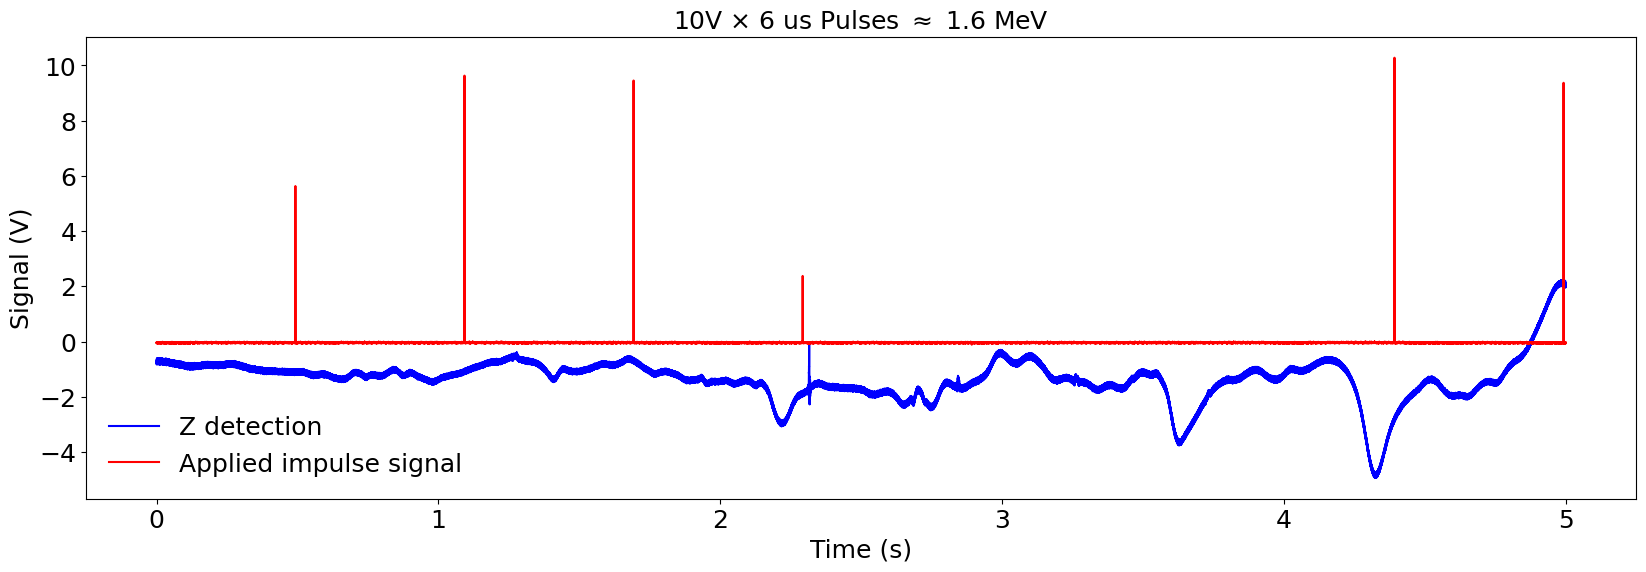

In [246]:
data_file = r"D:\Experiment\Pulse\20231118\pulse_10v_6us\pulse_10v_2us_01.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

plot_tod(data, r'10V $\times$ 6 us Pulses $\approx$ 1.6 MeV')
plt.show()

filtered = get_filtered_signal(data, 40000, 44000)

Text(0.5, 1.0, '10V $\\times$ 6 us Pulses $\\approx$ 1.6 MeV')

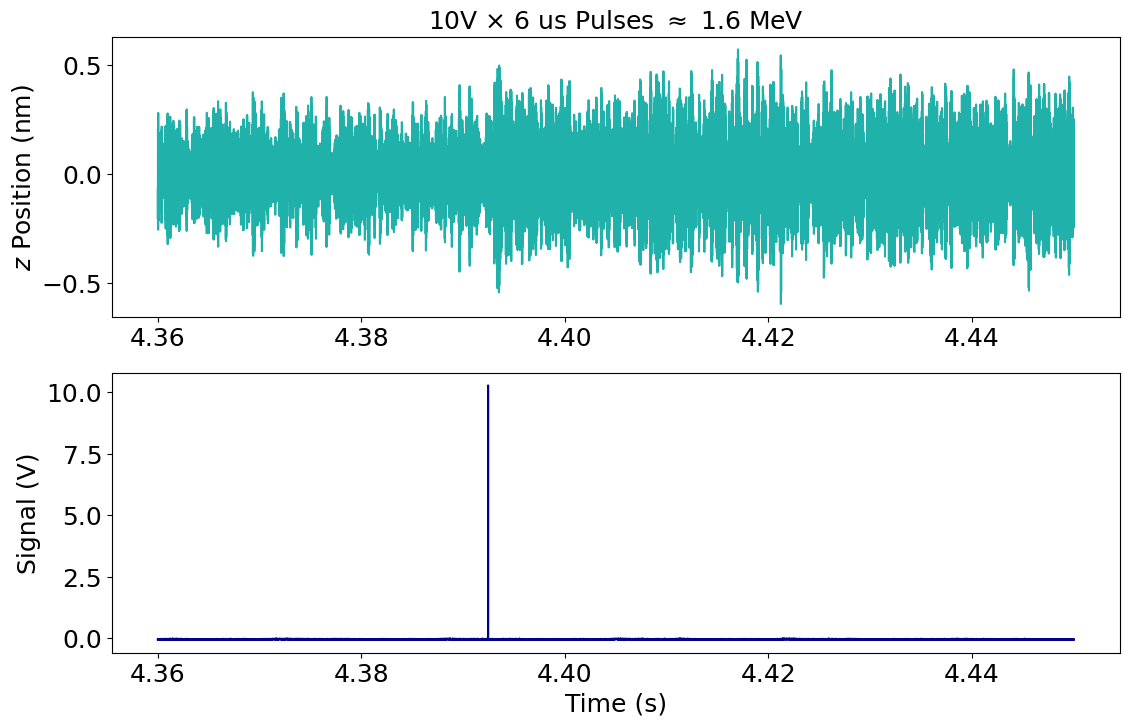

In [237]:
lb, ub = 872000, 890000
# lb, ub = 872000, 999900

fig, ax = plt.subplots(2, 1, figsize = (13, 8))
ax[0].plot(data[0, lb:ub], filtered[lb:ub]/np.sqrt(c_cal_square)/1e-9, label="Z detection (filtered)", color='lightseagreen')
ax[1].plot(data[0, lb:ub], data[2, lb:ub], label="Applied impulse signal", color='darkblue')

ax[1].set_xlabel('Time (s)', fontsize=18)
ax[0].set_ylabel('$z$ Position (nm)', fontsize=18)
ax[1].set_ylabel('Signal (V)', fontsize=18)
ax[0].set_title(r'10V $\times$ 6 us Pulses $\approx$ 1.6 MeV', fontsize=18)

The pulses are 1624.721365933103 kev


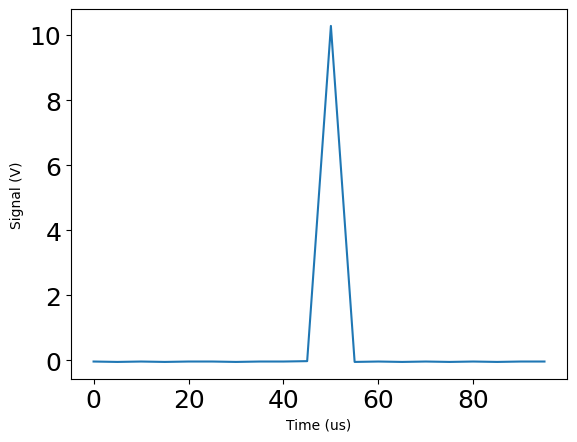

In [217]:
lb, ub = 878480, 878500

plt.plot((data[0, lb:ub] - data[0, lb])*1e6, data[2, lb:ub])
plt.xlabel('Time (us)')
plt.ylabel('Signal (V)')

print(f'The pulses are {f0 * np.trapz(data[2, lb:ub]+data[2, lb], data[0, lb:ub]) * SI2ev / 1000} kev')

In [247]:
lb, ub = 871000, 980000
# lb, ub = 872000, 999900

z_filtered_nm = filtered/np.sqrt(c_cal_square)/1e-9
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
lp_filtered = lowpass_filtered(z_filtered_nm**2, fs, 50000)

Text(0.5, 1.0, '10V $\\times$ 6 us Pulses $\\approx$ 1.6 MeV')

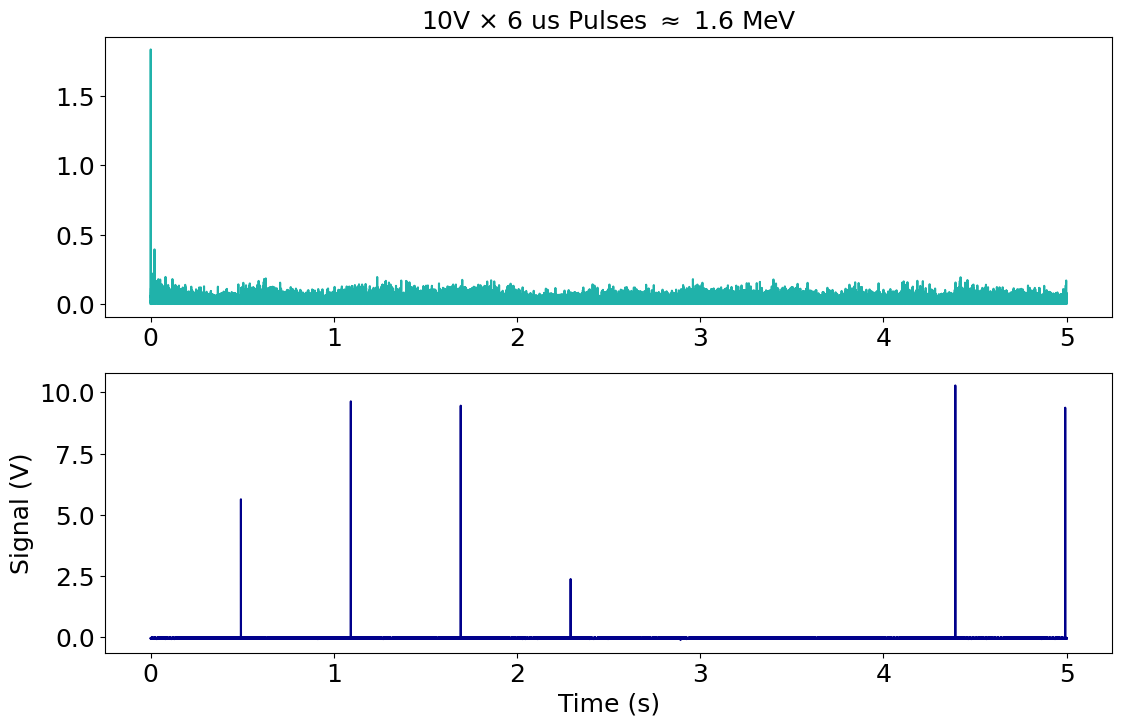

In [248]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))
ax[0].plot(data[0], lp_filtered, label="Z detection (filtered)", color='lightseagreen')
ax[1].plot(data[0], data[2], label="Applied impulse signal", color='darkblue')

ax[1].set_xlabel('Time (s)', fontsize=18)
# ax[0].set_ylabel('$z$ Position (nm)', fontsize=18)
ax[1].set_ylabel('Signal (V)', fontsize=18)
ax[0].set_title(r'10V $\times$ 6 us Pulses $\approx$ 1.6 MeV', fontsize=18)

## 5 V, 6 us pulses

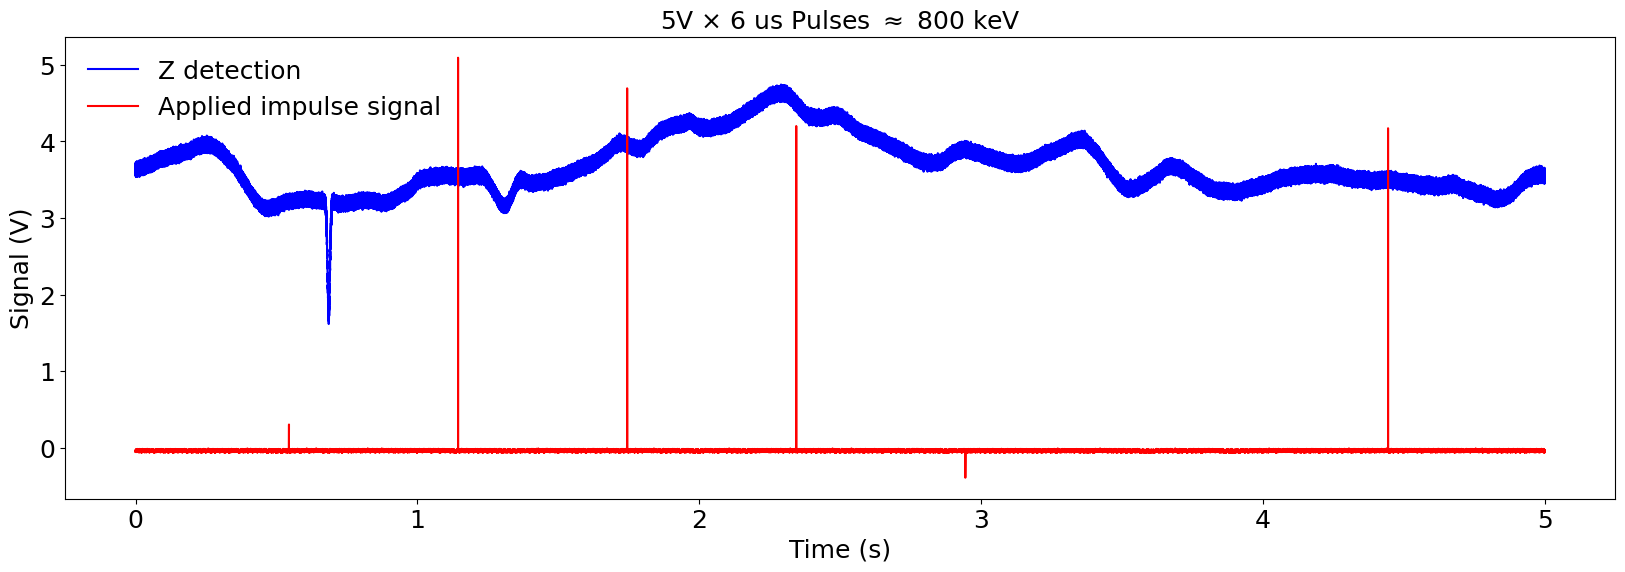

In [234]:
data_file = r"D:\Experiment\Pulse\20231118\pulse_5v_6us_2\pulse_5v_6us_2_07.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

plot_tod(data, r'5V $\times$ 6 us Pulses $\approx$ 800 keV')
plt.show()

filtered = get_filtered_signal(data, 40000, 44000)

Text(0.5, 1.0, '5V $\\times$ 6 us Pulses $\\approx$ 800 keV')

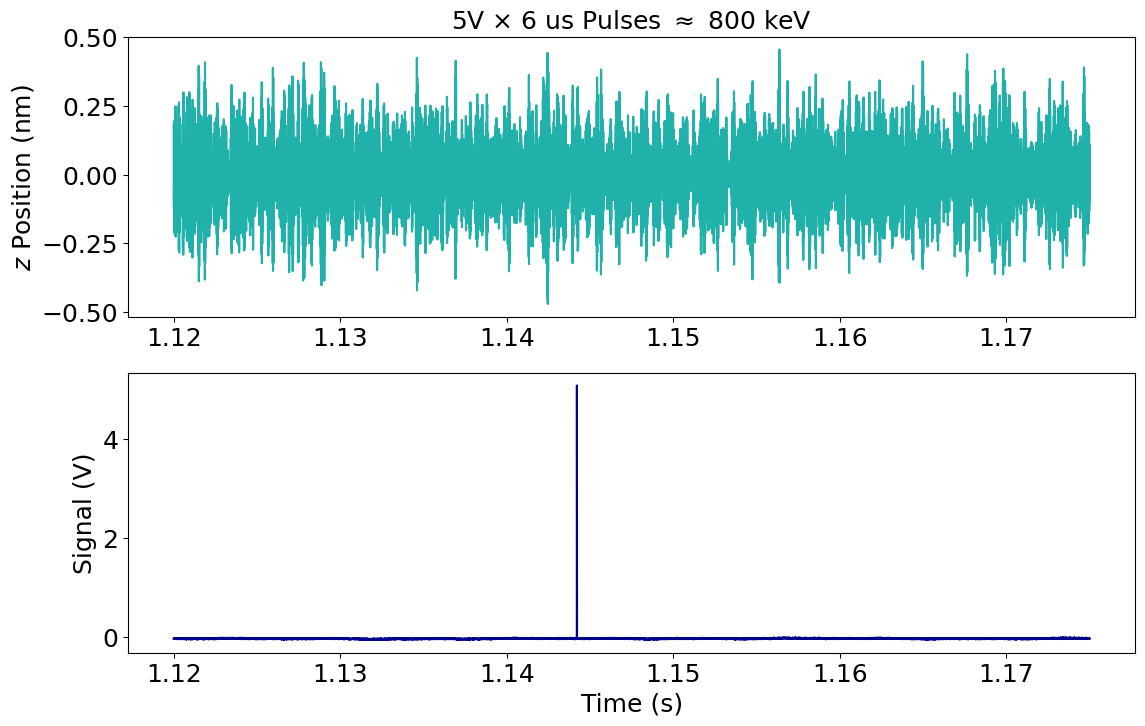

In [235]:
lb, ub = 224000, 235000
# lb, ub = 224000, 405000

fig, ax = plt.subplots(2, 1, figsize = (13, 8))
ax[0].plot(data[0, lb:ub], filtered[lb:ub]/np.sqrt(c_cal_square)/1e-9, label="Z detection (filtered)", color='lightseagreen')
ax[1].plot(data[0, lb:ub], data[2, lb:ub], label="Applied impulse signal", color='darkblue')

ax[1].set_xlabel('Time (s)', fontsize=18)
ax[0].set_ylabel('$z$ Position (nm)', fontsize=18)
ax[1].set_ylabel('Signal (V)', fontsize=18)
ax[0].set_title(r'5V $\times$ 6 us Pulses $\approx$ 800 keV', fontsize=18)

The pulses are 833.4420778412307 kev


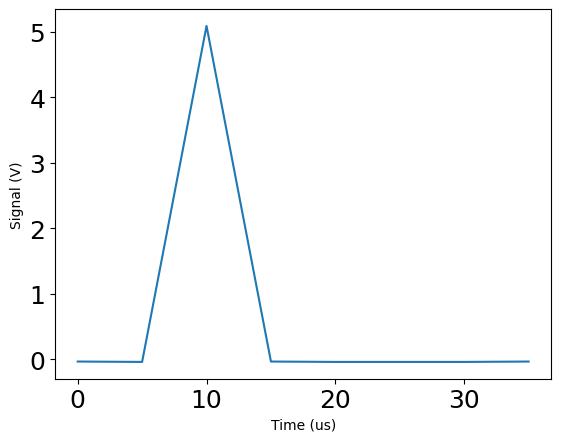

In [233]:
lb, ub = 228840, 228848

plt.plot((data[0, lb:ub] - data[0, lb])*1e6, data[2, lb:ub])
plt.xlabel('Time (us)')
plt.ylabel('Signal (V)')

print(f'The pulses are {f0 * np.trapz(data[2, lb:ub]+data[2, lb], data[0, lb:ub]) * SI2ev / 1000} kev')

## 0.5 V, 6 us pulses

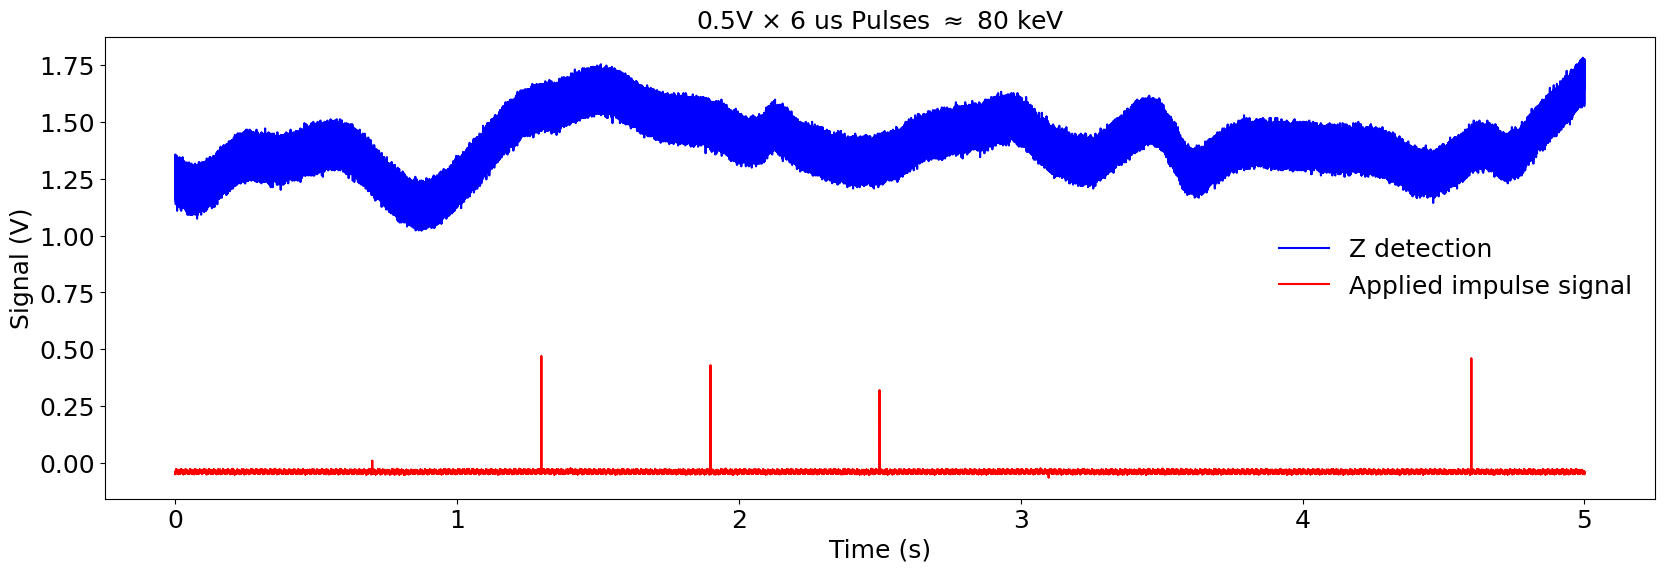

In [48]:
data_file = r"D:\Experiment\Pulse\20231118\pulse_05v_6us\pulse_05v_6us_05.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

plot_tod(data, r'0.5V $\times$ 6 us Pulses $\approx$ 80 keV', mv=False)
plt.show()

filtered = get_filtered_signal(data, 40000, 44000)

In [49]:
z_nm = data[1]/np.sqrt(c_cal_square)/1e-9
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
lp_filtered = lowpass_filtered(z_filtered_nm**2, fs, 100)

Text(0, 0.5, 'Signal (V)')

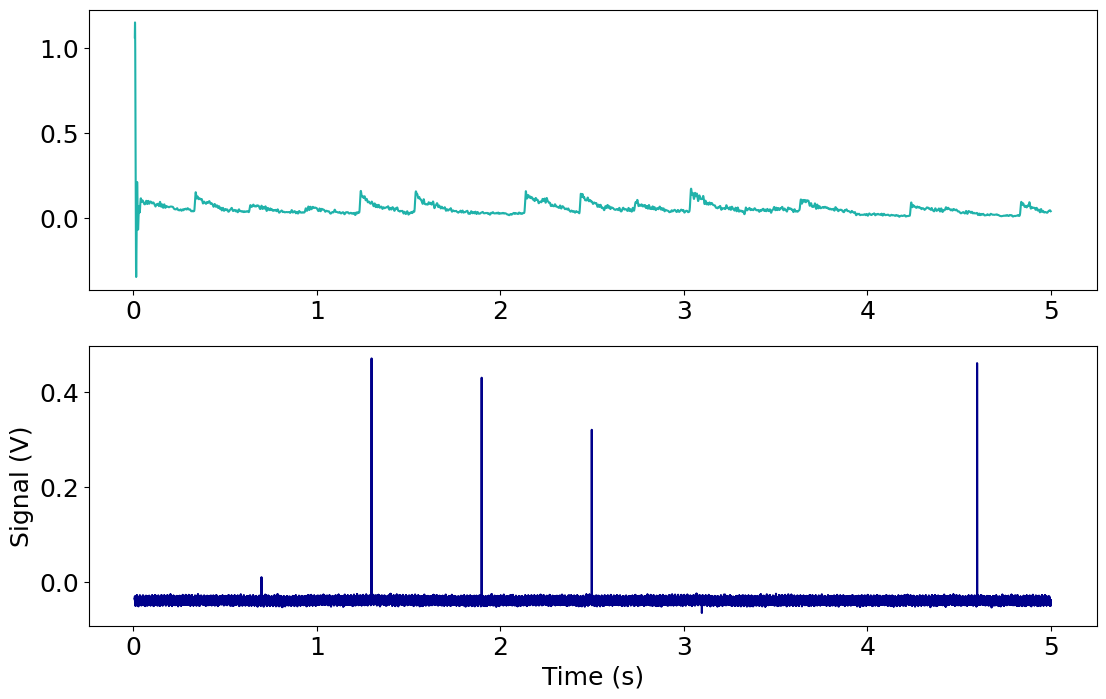

In [50]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))
ax[0].plot(data[0, 1700:], lp_filtered[1700:], label="Z detection (filtered)", color='lightseagreen')
ax[1].plot(data[0, 1700:], data[2, 1700:], label="Applied impulse signal", color='darkblue')

ax[1].set_xlabel('Time (s)', fontsize=18)
# ax[0].set_ylabel('$z$ Position (nm)', fontsize=18)
ax[1].set_ylabel('Signal (V)', fontsize=18)
# ax[0].set_title(r'20V $\times$ 6 us Pulses $\approx$ 3.3 MeV', fontsize=18)